# Statistics

วิชาสถิติเหมือนเป็นผีหลอกหลอนวัยเด็กของทุกคน ทุกชาติ คือเรียนเพราะต้องเรียน เรียนเพราะมันมีประโยชน์

แต่ตอนนี้สถิติสนุกขึ้นเยอะขึ้นจากตอนเด็ก ๆ แล้วเพราะเราสามารถเล่นกับข้อมูลได้โดยตรง 

-  Summary Statistics 
-  Bias and variance of estimators
-  Normal distribution

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('ggplot')

# This makes sure that graphs render in your notebook.
%matplotlib inline

<a id="codealong-examining-the-titanic-dataset"></a>
## Code-Along: Examining the Titanic Data Set
---

Objective: อ่านข้อมูลและคำนวณ summary statistics ต่าง ๆ

In [2]:
titanic = pd.read_csv('./titanic.csv')

#### Print out the column names:

In [15]:
# Answer:

Index([u'survived', u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'ticket', u'fare', u'cabin', u'embarked'],
      dtype='object')

#### Print out the dimensions of the DataFrame using the `.shape` attribute:

In [14]:
# Preview data dimensions.

#### Print out the data types of the columns using the `.dtypes` attribute:

In [30]:
# What are the column data types?
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

#### Print out the first five rows of the data using the built-in `.head()` function:

In [3]:
# Look at the first five rows.
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Use the built-in  `.value_counts()` function to count the values of each type in the `pclass` column:

In [12]:
# Count the values of the plcass variable.
titanic.cabin.isnull().value_counts(normalize=True)

True     0.771044
False    0.228956
Name: cabin, dtype: float64

#### Pull up descriptive statistics for each variable using the built-in `.describe()` function:

In [4]:
# Pull up descriptive statistics for each variable.
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


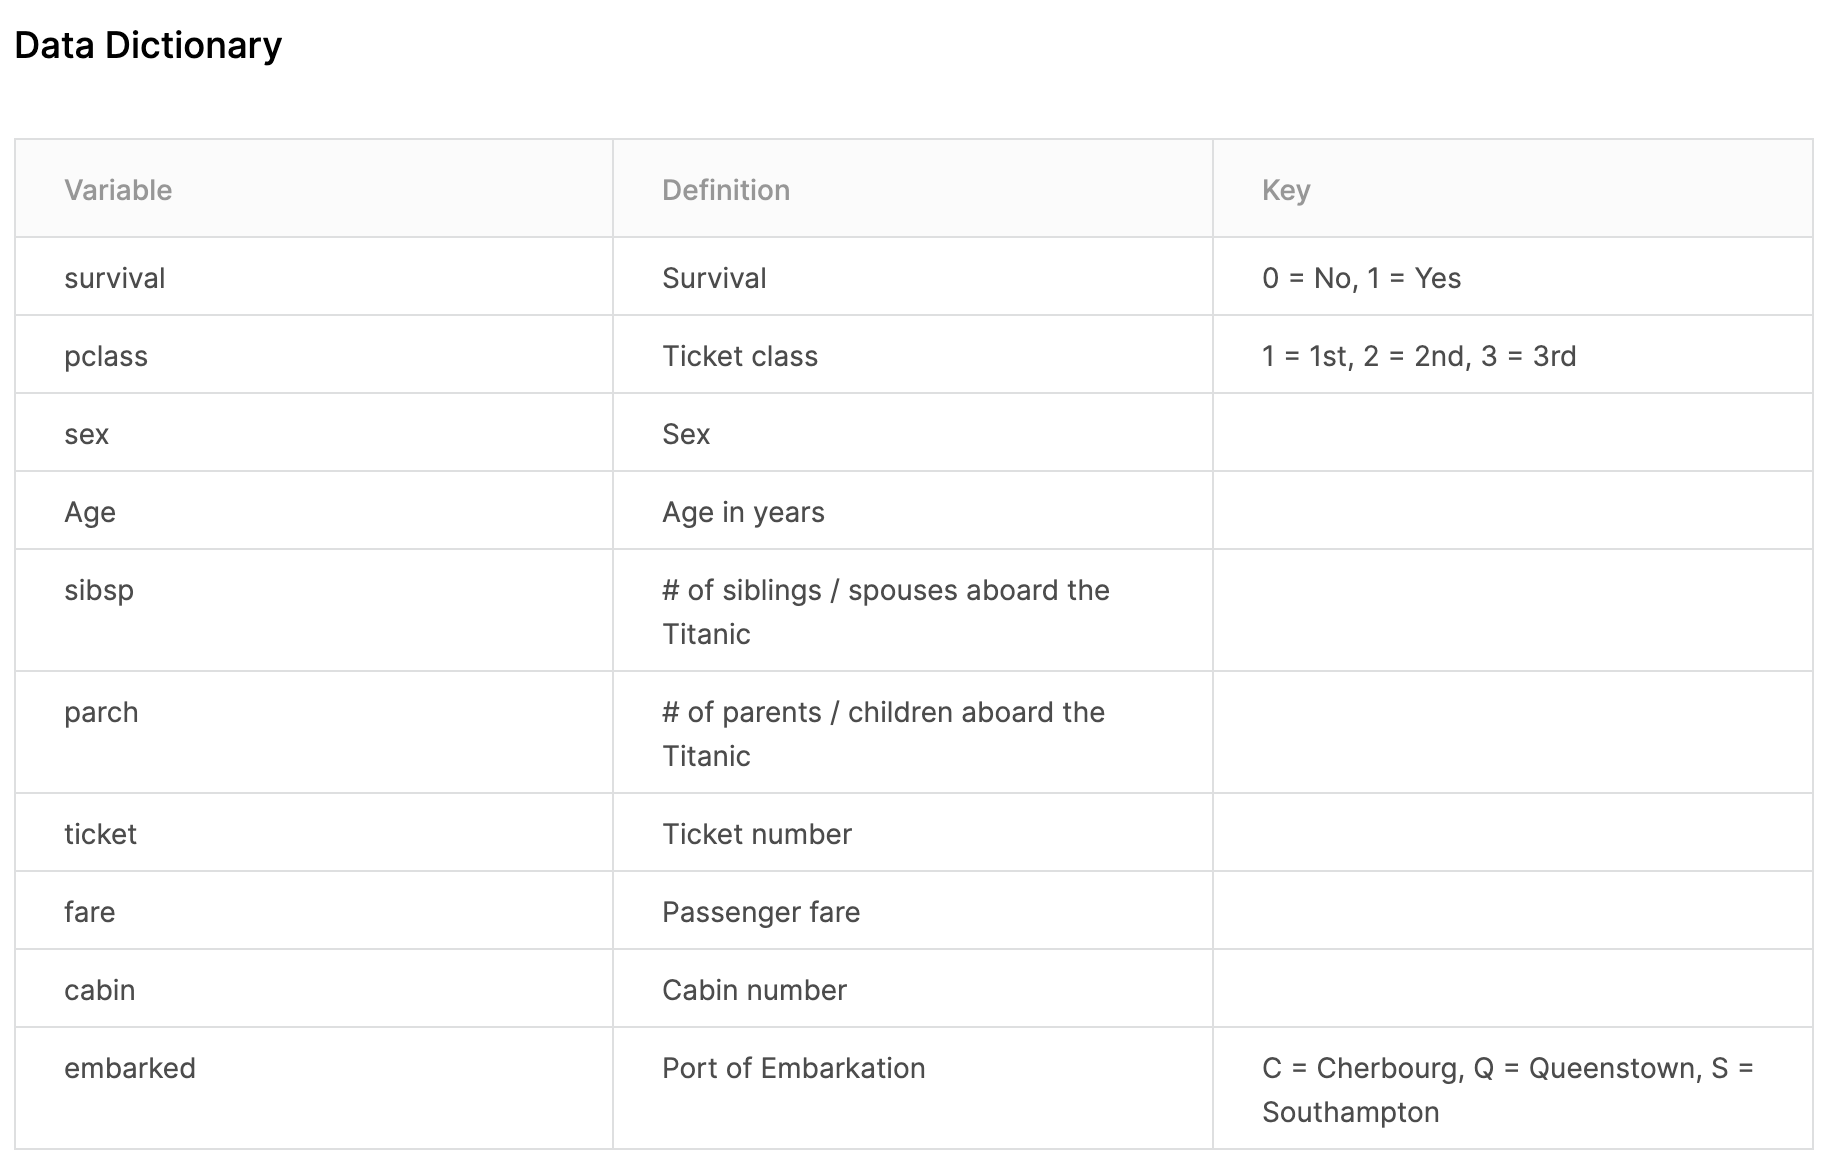

### ตรวจสอบคุณภาพของข้อมูล

-  ได้ข้อมูลมาอย่างแรกเราควรคำนวณ summary statistics เพื่อดูว่ามีอะไรหลุดๆ หรือเปล่า 
-  ถ้าข้อมูลหายๆ แหว่งๆ ต้องแก้ให้เรียบร้อยก่อน


<a id="descriptive-statistics-fundamentals"></a>
## Descriptive Statistics Fundamentals
---

- **Objective:** Code summary statistics using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.

### A Quick Review of Notation

The sum of a constant, $k$, $n$ times:
$$\sum_{i=1}^nk$$

In [20]:
# k + k + k + k + ... + k

> It is often helpful to think of these sums as `for` loops. For example, the equation can be compactly computed like so:

```
total = 0

# For i from 1 up to and including n, add k to the sum.
for i in range(1, n+1):
    total += k
```

> Or, even more succinctly (using a generator comprehension):

```
total = sum(k for i in range(1, n+1))
```

The sum of all numbers from 1 up to and including $n$:
$$\sum_{i=1}^ni$$

In [21]:
# 1 + 2 + 3 + ... + n

The sum of all $x$ from the first $x$ entry to the $n$th $x$ entry:
$$\sum_{i=0}^nx_i$$

In [22]:
# x_1 + x_2 + x_3 + ... + x_n

#### Code-Along

_Optional: Write down the mathematical notation for the following questions:_

In [6]:
# Compute the sum of seven 4s using base Python.
import numpy as np


[4, 4, 4, 4, 4, 4, 4]

In [7]:
# Compute the sum of seven 4s using NumPy.

[4 for i in range(7)]
# np.sum([4 for i in range (7)])

[4, 4, 4, 4, 4, 4, 4]

In [10]:
# Compute the sum of 1 through 10 using base Python.

total = 0
for i in range(1, 10+1):
    total += i
print(total)
print(10 * (10 +1) /2)

55
55.0


In [11]:
# Using the titanic.fare column, compute the total fare paid by passengers.

titanic.fare.sum()

28693.9493

<a id="measures-of-central-tendency"></a>
### Measures of Central Tendency

- Mean
- Median
- Mode

#### Mean
The mean — also known as the average or expected value — is defined as:
$$E[X] = \bar{X} =\frac 1n\sum_{i=1}^nx_i$$

It is determined by summing all data points in a population and then dividing the total by the number of points. The resulting number is known as the mean or the average.

Be careful — the mean can be highly affected by outliers. For example, the mean of a very large number and some small numbers will be much larger than the "typical" small numbers. Earlier, we saw that the mean squared error (MSE) was used to optimize linear regression. Because this mean is highly affected by outliers, the resulting linear regression model is, too.

#### Median
The median refers to the midpoint in a series of numbers. Notice that the median is not affected by outliers, so it more so represents the "typical" value in a set.

$$ 0,1,2,[3],5,5,1004 $$

$$ 1,3,4,[4,5],5,5,7 $$

To find the median:

- Arrange the numbers in order from smallest to largest.
    - If there is an odd number of values, the middle value is the median.
    - If there is an even number of values, the average of the middle two values is the median.

Although the median has many useful properties, the mean is easier to use in optimization algorithms. The median is more often used in analysis than in machine learning algorithms.

#### Mode
The mode of a set of values is the value that occurs most often.
A set of values may have more than one mode, or no mode at all.

$$1,0,1,5,7,8,9,3,4,1$$ 

$1$ is the mode, as it occurs the most often (three times).

#### Code-Along

In [14]:
# Find the mean of the titanic.fare series using base Python:

total = 0
for x in titanic.fare:
        total += x
        
print( total / len(titanic.fare))

32.2042079685746


In [15]:
# Find the mean of the titanic.fare series using NumPy:

np.mean(titanic.fare)

32.2042079685746

In [16]:
# Find the mean of the titanic.fare series using Pandas:

titanic.fare.mean()

32.2042079685746

In [17]:
# What was the median fare paid (using Pandas)?

titanic.fare.median()

14.4542

In [33]:
# Use Pandas to find the most common fare paid on the Titanic:

<a id="math-review"></a>
### Math Review

#### How Do We Measure Distance?

One method is to take the difference between two points:

$$X_2 - X_1$$

However, this can be inconvenient because of negative numbers.

We often use the following square root trick to deal with negative numbers. Note this is equivalent to the absolute value (if the points are 1-D):

$$\sqrt{(X_2-X_1)^2} = | X_2 - X_1 |$$



#### What About Distance in Multiple Dimensions?

We can turn to the Pythagorean theorem.

$$a^2 + b^2 = c^2$$

To find the distance along a diagonal, it is sufficient to measure one dimension at a time:

$$\sqrt{a^2 + b^2} = c$$

More generally, we can write this as the norm (You'll see this in machine learning papers):

$$\|X\|_2 = \sqrt{\sum{x_i^2}} = c$$

What if we want to work with points rather than distances? For points $\vec{x}: (x_1, x_1)$ and $\vec{y}: (y_1, y_2)$ we can write:

$$\sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2} = c$$
or
$$\sqrt{\sum{(x_i - y_i)^2}} = c$$
or
$$\| \vec{x} - \vec{y} \| = c$$


# Population vs Sample
* Population หมายถึง data ที่ครบสมบูรณ์ 
* Sample หมายถึง สุ่มตัวอย่าง data ไม่สมบูรณ์ โดยเฉลี่ยแล้ว sample mean จะใกล้กับ population mean

In [23]:
# sample mean
titanic.sample(n=500).fare.mean()

33.02471619999997

In [24]:
# population mean
titanic.fare.mean()

32.2042079685746

<a id="measures-of-dispersion-standard-deviation-and-variance"></a>
### Measures of Dispersion: Standard Deviation and Variance

Standard deviation (SD, $σ$ for population standard deviation, or $s$ for sample standard deviation) is a measure that is used to quantify the amount of variation or dispersion from the mean of a set of data values. 

* A low standard deviation means that most of the numbers are close to the average. 
* A high standard deviation means that the numbers are spread out.

In [7]:
nums = [5, 5, 5, 5, 5, 10]
np.std(nums)

1.863389981249825

In [8]:
np.var(nums)

3.4722222222222228


Standard deviation is the square root of variance:

$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n-1}$$

$$s = \sqrt{\frac {\sum{(x_i - \bar{X})^2}} {n-1}}$$

> **Standard deviation** ใช้สะดวกเวลา analyze การกระจายตัวของ data เพราะระยะห่าง (absolute distance) เฉลี่ย

> **Variance** is often used for efficiency in computations. เพราะ square root มันเกะกะ เวลาอยากเขียน proof

**That can be a lot to take in, so let's break it down in Python.**

#### Assign the first 5 rows of titanic age data to a variable:

In [19]:
# Take the first five rows of titanic age data.
age = titanic.age.head(5)

#### Calculate the mean by hand:

In [35]:
# Calculate mean by hand.

In [35]:
# Calculate mean by pandas.

#### Calculate the variance by hand:

In [25]:
# Calculate variance by hand
np.sum((age - age.mean()) ** 2/ (len(age) - 1))

46.699999999999996

In [20]:
# Calculate variance by pandas
age.var()

46.699999999999996

<a id="our-first-model"></a>
## Our First Model
---
โมเดล แปลว่า แบบจำลองเพื่อจะมาเป็นตัวแทนของข้อมูลในโลกจริง เช่น

* รถ --> (ราคา, รุ่น, ปีที่ผลิต, จำนวนประตู)
* ลูกค้า --> (อายุ, รายได้, เพศ) 
* ลูกค้า --> (อายุ, รายได้, เพศ, จังหวัดที่อาศัยอยู่, เป็นลูกค้ามานานแค่ไหนแล้ว, ค่าบริการรวมต่อเดือน) 

# Mathematical Model

ลูกค้าจะ Churn ถ้าเป็นลูกค้ามาไม่นาน และค่าบริการรวมต่อเดือนสูง

Churn if `-1 * month + 0.05 * bill > 200`


---

Let's make our first model from scratch. We'll use it predict the `fare` column in the Titanic data. So what data will we use? Actually, none. The simplest model we can build is an estimation of the mean, median, or most common value. 

#### Get the `fare` column from the Titanic data and store it in variable `y`:

In [26]:
# Get the fare column from the Titanic data and store it as y:
y = titanic.fare

#### Create predictions `y_pred` (in this case just the mean of `y`):

In [28]:
# Stored predictions in y_pred:
y_pred = titanic.fare.mean()
y_pred

32.2042079685746

#### Find the average squared distance between each prediction and its actual value:

This is known as the mean squared error (MSE).

In [35]:
# Squared error is hard to read; let's look at mean squared error:

error = y - y_pred
squre_error = error ** 2
mean_square_error = np.mean(squre_error)
mean_square_error

2466.6653116850434

#### Calculate the root mean squared error (RMSE), the square root of the MSE:

In [36]:
# 
np.sqrt(mean_square_error) bnm 

49.66553444477411

<a id="a-short-introduction-to-model-bias-and-variance"></a>
## A Short Introduction to Model Bias and Variance 

---

- **Objective:** Describe the bias and variance of statistical estimators.

In simple terms, **bias** shows how accurate a model is in its predictions. (It has **low bias** if it hits the bullseye!)

**Variance** shows how reliable a model is in its performance. (It has **low variance** if the points are predicted consistently!)

These characteristics have important interactions, but we will save that for later.

![Bias and Variance](assets/images/biasVsVarianceImage.png)

# Estimator
(sample) mean และ variance เป็นค่าที่เรา estimate มาจากข้อมูล เพราะฉะนั้นเราสามารถคำนวณ

* Bias ของ sample mean: แม่นยำขนาดไหน เชื่อได้มากแค่ไหน
* Variance ของ sample mean: sample mean จะดิ้นได้มากแค่ไหน ถ้าเราสุ่มเจอข้อมูลที่แย่ ๆ


<a id="bias-variance-decomposition"></a>
### Bias-Variance Decomposition

In the following notation, $f(x)$ refers to a perfect estimator, while $\hat{f}$ refers to our estimator.

**Mean Squared Error**
$$MSE(\hat{f}(x)) = E[(\hat{f}(x) - f(x))^2] = Variance + Bias^2 + \sigma_y$$

**Bias**

Error caused by bias is calculated as the difference between the expected prediction of our model and the correct value we are trying to predict:

$$Bias = E[\hat{f}(x)] - f(x)$$

**Variance**

Error caused by variance is taken as the variability of a model prediction for a given point:

$$Variance = E[(\hat{f}(x) - E[\hat{f}(x)])^2]$$

**Irreducible Error**

ต่อให้ estimator ดีขนาดไหนก็ยังดิ้นได้อีก

<a id="example-using-bessels-correction"></a>
### Example Using Bessel's Correction

It's rarely practical to measure every single item in a population to gather a statistic. We will usually sample a few items and use those to infer a population value.

For example, we can take a class of 200 students and measure their height, but rather than measuring everyone, we select students at random to estimate the average height in the class and the variance of the height in the class.

We know we can take the mean as follows:

$$E[X] = \bar{X} =\frac 1n\sum_{i=1}^nx_i$$


# What about the variance?

Intuitively and by definition, population variance looks like this (the average distance from the mean):

$$\frac {\sum{(x_i - \bar{X})^2}} {n}$$

It's actually better to use the following for a sample (why?):

$$\frac {\sum{(x_i - \bar{X})^2}} {n-1}$$

In some cases, we may even use:

$$\frac {\sum{(x_i - \bar{X})^2}} {n+1}$$

Let's walk through an example of computing the variance by hand.

Suppose we have the following data:

$$X = [1, 2, 3, 4, 4, 10]$$

First, we compute its mean: 

$$\bar{X} = (1/6)(1 + 2 + 3 + 4 + 4 + 10) = 4$$

Because this is a sample of data rather than the full population, we'll use the second formula. Let's first "mean center" the data:

$$X_{centered} = X - \bar{X} = [-3, -2, -1, 0, 0, 6]$$

Now, we'll simply find the average squared distance of each point from the mean:

$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n-1} = \frac {(-3)^2 + (-2)^2 + (-1)^2 + 0^2 + 0^2 + 6^2}{6-1} = \frac{14 + 36}{5} = 10$$

So, the **variance of $X$** is $10$. However, we cannot compare this directly to the original units, because it is in the original units squared. So, we will use the **standard deviation of $X$**, $\sqrt{10} \approx 3.16$ to see that the value of $10$ is farther than one standard deviation from the mean of $4$. So, we can conclude it is somewhat far from most of the points (more on what it really might mean later).

---

A variance of $0$ means there is no spread. If we instead take $X = [1, 1, 1, 1]$, then clearly the mean $\bar{X} = 1$. So, $X_{centered} = [0, 0, 0, 0]$, which directly leads to a variance of $0$. (Make sure you understand why! Remember that variance is the average squared distance of each point from the mean.)

In [41]:
heights = np.random.rand(200) + 6.5

In [42]:
def plot_means(sample_size):
    true_mean = np.mean(heights)
    
    mean_heights = []
    for n in range(5,sample_size):
        for j in range(30):
            mean_height = np.mean(np.random.choice(heights, n, replace=False))
            mean_heights.append((n, mean_height))
    
    sample_height = pd.DataFrame(mean_heights, columns=['sample_size', 'height'])
    sample_height.plot.scatter(x='sample_size', y='height', figsize=(14, 4), alpha=0.5)
    
    plt.axhline(y=true_mean, c='r')
    plt.title("The Bias and Variance of the Mean Estimator")
    plt.show()

In [43]:
def plot_variances(sample_size):
    true_variance = np.var(heights)
    
    var_heights = []
    for n in range(5,sample_size):
        for j in range(30):
            var_height1 = np.var(np.random.choice(heights, n, replace=False), ddof=0)
            var_height2 = np.var(np.random.choice(heights, n, replace=False), ddof=1)
            var_height3 = np.var(np.random.choice(heights, n, replace=False), ddof=-1)
            var_heights.append((n, var_height1, var_height2, var_height3))
    
    sample_var = pd.DataFrame(var_heights, columns=['sample_size', 'variance1', 'variance2', 'variance3'])
    sample_var.plot.scatter(x='sample_size', y='variance1', figsize=(14, 3), alpha=0.5)
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Population Variance Estimator (n)")
    
    sample_var.plot.scatter(x='sample_size', y='variance3', figsize=(14, 3), alpha=0.5)
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Biased Sample Variance Estimator (n+1)")
    
    sample_var.plot.scatter(x='sample_size', y='variance2', figsize=(14, 3), alpha=0.5)
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Sample Variance Estimator (n-1)")
    plt.show()

In [44]:
interact(plot_means, sample_size=(5,200));

interactive(children=(IntSlider(value=102, description='sample_size', max=200, min=5), Output()), _dom_classes…

- The red line in the chart above is the true average height, but because we don't want to ask 200 people about their height, we take a samples.

- The blue dots show the estimate of the average height after taking a sample. To give us an idea of how sampling works, we simulate taking multiple samples.

- The $X$ axis shows the sample size we take, while the blue dots show the likely average heights we'll conclude for a given sample size.

- Even though the true average height is around 7 feet, a small sample may lead us to think that it's actually 6.7 or 7.3 feet. 

- Notice that the red line is in the center of our estimates. On average, we are correct and have no bias.

- If we take a larger sample size, we get a better estimate. This means that the variance of our estimate gets smaller with larger samples sizes.

In [45]:
interact(plot_variances, sample_size=(5,200));

interactive(children=(IntSlider(value=102, description='sample_size', max=200, min=5), Output()), _dom_classes…

- Not all estimators are created equal.

- The red lines in the charts above show the true variance of height.

- The top graph is the population variance estimator, while the bottom graph is the sample variance estimator.

- It's subtle, but notice that the population variance estimator is not centered on the red line. It's actually biased and consistently underestimates the true variance, especially at low sample sizes.

- You may also notice that the scatter of the population variance estimator is smaller. That means the variance of the population variance estimator is smaller. Essentially, it's the variability of the estimator. 

- Play around with the sliders to get a good view of the graphs.

<a id="correlation-and-association"></a>
## Correlation and Association
---

- **Objective:** Describe characteristics and trends in a data set using visualizations.

Correlation measures how variables related to each other.

Typically, we talk about the Pearson correlation coefficient — a measure of **linear** association.

We refer to perfect correlation as **colinearity**.

The following are a few correlation coefficients. Note that if both variables trend upward, the coefficient is positive. If one trends opposite the other, it is negative. 

It is important that you always look at your data visually — the coefficient by itself can be misleading:

![Example correlation values](./assets/images/correlation_examples.png)

<a id="codealong-correlation-in-pandas"></a>
### Code-Along: Correlation in Pandas

**Objective:** Explore options for measuring and visualizing correlation in Pandas.

#### Display the correlation matrix for all Titanic variables:

In [46]:
# A:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Use Seaborn to plot a heat map of the correlation matrix:

The `sns.heatmap()` function will accomplish this.

- Generate a correlation matrix from the Titanic data using the `.corr()` method.
- Pass the correlation matrix into `sns.heatmap()` as its only parameter.

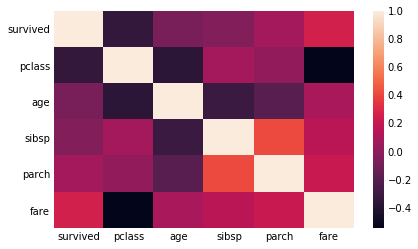

In [27]:
# Use Seaborn to plot a correlation heat map
sns.heatmap(titanic.corr());

In [49]:
# Take a closer look at the survived and fare variables using a scatter plot

# Is correlation a good way to inspect the association of fare and survival?

<a id="the-normal-distribution"></a>
## The Normal Distribution
---

- **Objective:** Identify a normal distribution within a data set using summary statistics and data visualizations.

###  Math Review
- What is an event space?
  - A listing of all possible occurrences.
- What is a probability distribution?
  - A function that describes how events occur in an event space.
- What are general properties of probability distributions?
  - All probabilities of an event are between 0 and 1.
  - The probability that something occurs is almost certain, or 1.
  

<a id="what-is-the-normal-distribution"></a>
### What is the Normal Distribution?
- A normal distribution is often a key assumption to many models.
  - In practice, if the normal distribution assumption is not met, it's not the end of the world. Your model is just less efficient in most cases.

- The normal distribution depends on the mean and the standard deviation.

- The mean determines the center of the distribution. The standard deviation determines the height and width of the distribution.

- Normal distributions are symmetric, bell-shaped curves.

- When the standard deviation is large, the curve is short and wide.

- When the standard deviation is small, the curve is tall and narrow.

![normal distribution](assets/images/normal.png)


#### Why do we care about normal distributions?

- They often show up in nature.
- Aggregated processes tend to distribute normally, regardless of their underlying distribution — provided that the processes are uncorrelated or weakly correlated (central limit theorem).
- They offer effective simplification that makes it easy to make approximations.

#### Plot a histogram of 1,000 samples from a random normal distribution:

The `np.random.randn(numsamples)` function will draw from a random normal distribution with a mean of 0 and a standard deviation of 1.

- To plot a histogram, pass a NumPy array with 1000 samples as the only parameter to `plt.hist()`.
- Change the number of bins using the keyword argument `bins`, e.g. `plt.hist(mydata, bins=50)`

In [50]:
# Plot a histogram of several random normal samples from NumPy.

<a id="skewness"></a>
###  Skewness
- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.
- Skewness can be positive or negative, or even undefined.
- Notice that the mean, median, and mode are the same when there is no skew.

![skewness](assets/images/skewness---mean-median-mode.jpg)

#### Plot a lognormal distribution generated with NumPy.

Take 1,000 samples using `np.random.lognormal(size=numsamples)` and plot them on a histogram.

In [51]:
# Plot a lognormal distribution generated with NumPy

#####  Real World Application - When mindfullness beats complexity
- Skewness is surprisingly important.
- Most algorithms implicitly use the mean by default when making approximations.
- If you know your data is heavily skewed, you may have to either transform your data or set your algorithms to work with the median.

<a id="kurtosis"></a>
### Kurtosis
- Kurtosis is a measure of whether the data are peaked or flat, relative to a normal distribution.
- Data sets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly, and have heavy tails. 

![kurtosis](assets/images/kurtosis.jpg)

####  Real-World Application: Risk Analysis
- Long-tailed distributions with high kurtosis elude intuition; we naturally think the event is too improbable to pay attention to.
- It's often the case that there is a large cost associated with a low-probability event, as is the case with hurricane damage.
- It's unlikely you will get hit by a Category 5 hurricane, but when you do, the damage will be catastrophic.
- Pay attention to what happens at the tails and whether this influences the problem at hand.
- In these cases, understanding the costs may be more important than understanding the risks.

<a id="determining-the-distribution-of-your-data"></a>
## Determining the Distribution of Your Data
---

**Objective:** Create basic data visualizations, including scatterplots, box plots, and histograms.

![](./assets/images/distributions.png)

#### Use the `.hist()` function of your Titantic DataFrame to plot histograms of all the variables in your data.

- The function `plt.hist(data)` calls the Matplotlib library directly.
- However, each DataFrame has its own `hist()` method that by default plots one histogram per column. 
- Given a DataFrame `my_df`, it can be called like this: `my_df.hist()`. 

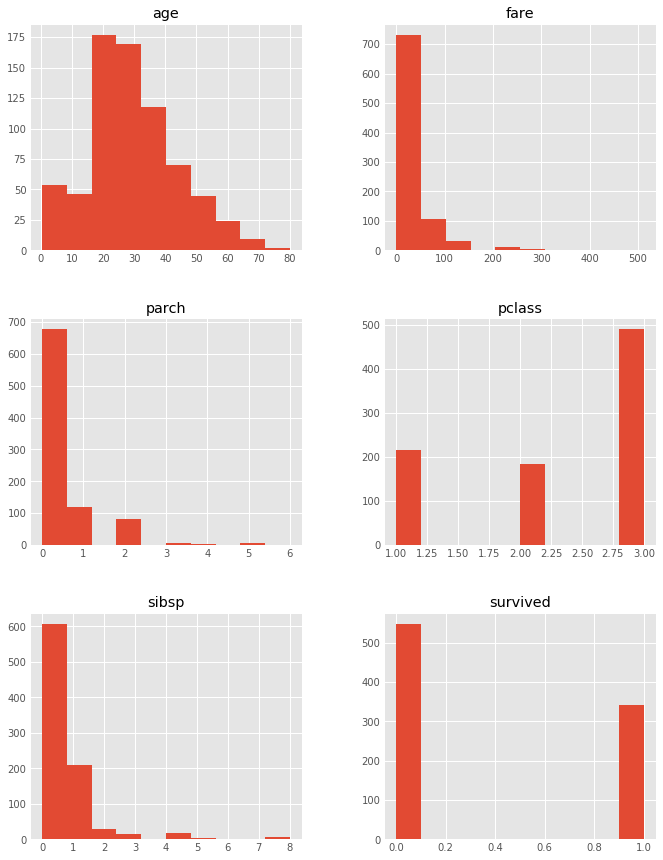

In [43]:
# Plot all variables in the Titanic data set using histograms:
titanic.hist(figsize=(10, 15));

#### Use the built-in `.plot.box()` function of your Titanic DataFrame to plot box plots of your variables.

- Given a DataFrame, a box plot can be made where each column is one tick on the x axis.
- To do this, it can be called like this: `my_df.plot.box()`.
- Try using the keyword argument `showfliers`, e.g. `showfliers=False`.

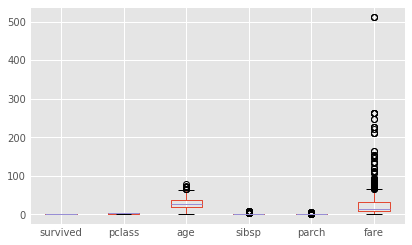

In [40]:
# Plotting all histograms can be unweildly; box plots can be more concise:
titanic.plot.box()

<a id="topic-review"></a>
## Lesson Review
---

- We covered several different types of summary statistics, what are they?
- We covered three different types of visualizations, which ones?
- Describe bias and variance and why they are important.
- What are some important characteristics of distributions?

**Any further questions?**